# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [94]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# connect to Google drive
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Understanding the structure of the data

In [95]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [96]:
df.shape

(1898, 9)

#### Observations:
1898 rows
9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
 - 4 columns of type int
 - 4 columns of type object
 - 1 column of type float

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [98]:
df.isna().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
No missing values


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [99]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [100]:
# calculating "ideal" bin width & count from scratch
# just to see it matches what Seaborn does automatically
from numpy.ma.core import floor
prep_time_binw = 2 * (31-23) / np.cbrt(1898)
del_time_binw = 2 * (28 - 20) / np.cbrt(1898)
prep_time_bins = (35-20) / prep_time_binw
del_time_bins = (33-15) / del_time_binw
print('Food Prep Time # bins:', round(prep_time_bins, 0))
print('Delivery Time # bins:', round(del_time_bins, 0))

Food Prep Time # bins: 12.0
Delivery Time # bins: 14.0


#### Observations:
Minimum, average and maximum food prep times are: 20 minutes, 27.4 minutes and 35 minutes, respectively.

### **Question 5:** How many orders are not rated? [1 mark]

In [101]:
# get rows with 'Not given', take only that column, get count
df[df['rating'] == 'Not given']['rating'].count()

736

#### Observations:
736 orders were not given a rating

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [102]:
print('Unique orders:', df['order_id'].nunique())
print('Unique customers:', df['customer_id'].nunique())
print('Restaurant count:', df['restaurant_name'].nunique())
print('Cuisine types:', df['cuisine_type'].nunique())

Unique orders: 1898
Unique customers: 1200
Restaurant count: 178
Cuisine types: 14


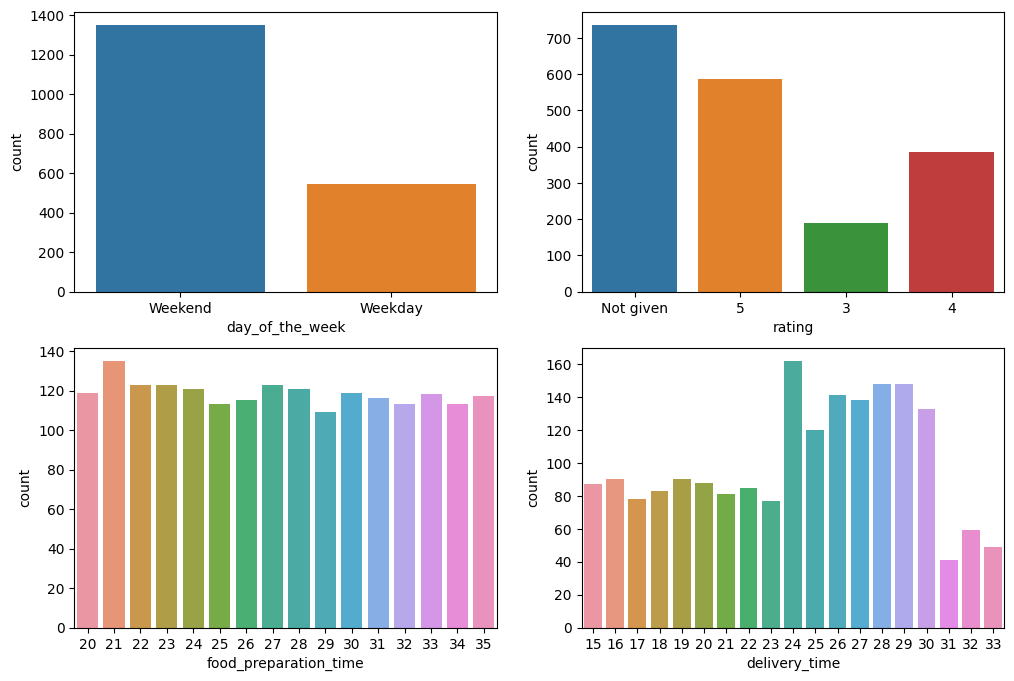

In [103]:
# create 2x2 grid of subplots
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(12,8))
sns.countplot(data=df, x='day_of_the_week', ax=axs[0,0])
sns.countplot(data=df, x='rating', ax=axs[0,1])
# countplots instead of histplots for time variables as they are discrete integer values
sns.countplot(data=df, x='food_preparation_time', ax=axs[1,0])
sns.countplot(data=df, x='delivery_time', ax=axs[1,1])
plt.show()

 - Interesting that there are no food ratings below 3
 - Food prep time looks to have a uniform distribution
 - Delivery time has a weird peak at 24-30 minutes
 - Far more food delivery orders on weekends than weekdays

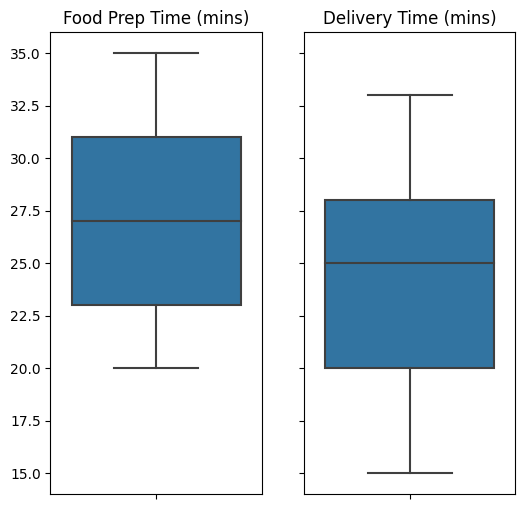

In [104]:
fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(6,6))
sns.boxplot(data=df, y='food_preparation_time', ax=axs[0])
sns.boxplot(data=df, y='delivery_time', ax=axs[1])
axs[0].set_ylabel('')
axs[0].set_title('Food Prep Time (mins)')
axs[1].set_ylabel('')
axs[1].set_title('Delivery Time (mins)')
plt.show()

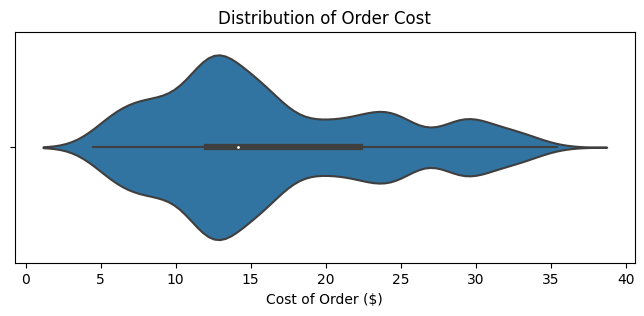

In [105]:
plt.figure(figsize = (8,3))
plt.title('Distribution of Order Cost')
sns.violinplot(data=df, x='cost_of_the_order')
plt.xlabel('Cost of Order ($)');

Order cost distribution is skewed right, which is not surprising. Peak is $10-15/order.

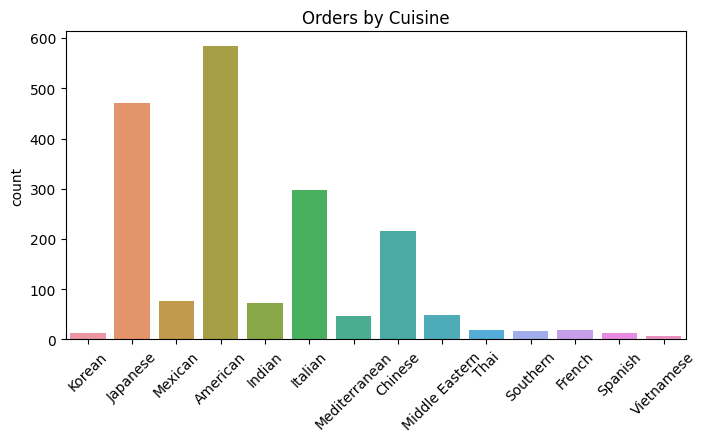

In [106]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='cuisine_type')
plt.xticks(rotation=45)
plt.xlabel('')
plt.title('Orders by Cuisine')
plt.show()

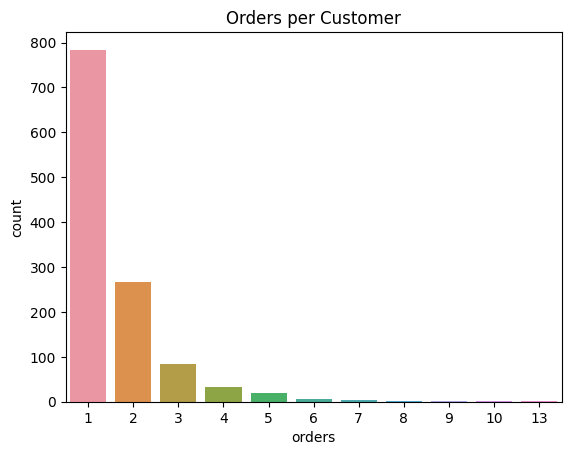

In [107]:
# count of orders per customer
by_cust = pd.DataFrame(df['customer_id'].value_counts())
# name column
by_cust.columns = ['orders']
sns.countplot(data=by_cust, x='orders')
plt.title('Orders per Customer');

Almost 2/3 of customers (there are 1200) have placed only 1 order. Over what period of time? Are customers also using other apps for retaurant delivery?

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [108]:
# count orders by restaurant, sort descending, return first 5
df.value_counts(subset='restaurant_name', ascending=False)[:5]

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
dtype: int64

#### Observations:
1. Shake Shack
2. The Meatball Shop
3. Blue Ribbon Sushi
4. Blue Ribbon Fried Chicken
5. Parm  

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [109]:
# filter to weekends, count orders by cuisine, sort descending and return first row
df[df['day_of_the_week']=='Weekend'].value_counts(subset='cuisine_type', ascending=False).head(1)

cuisine_type
American    415
dtype: int64

#### Observations:
American food is most popular on weekends

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [110]:
# count of orders >$20
over20 = df[df['cost_of_the_order']>20].order_id.count()
# count of all orders
order_ct = df.order_id.count()
pct_over20 = round(100 * over20 / order_ct, 1)
print(f'{pct_over20}% orders are over $20')

29.2% orders are over $20


#### Observations:
29% of orders are > $20


### **Question 10**: What is the mean order delivery time? [1 mark]

In [111]:
# From Q4, we already know it's 24.16 minutes
# round(df['delivery_time'].mean(), 2)

# get the mean
mean_del_time = df['delivery_time'].mean()
# whole number of minutes
mean_dt_min = int(round(mean_del_time, 0))
# and the fraction into seconds
sec = int(round((mean_del_time - mean_dt_min) * 60, 0))
print(f'{mean_dt_min} minutes {sec} seconds')

24 minutes 10 seconds


#### Observations:
Mean order delivery time is still 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [112]:
# Write the code here
df.value_counts(subset='customer_id', ascending=False)[:3]

customer_id
52832    13
47440    10
83287     9
dtype: int64

#### Observations:
Most frequent customers are 52832, 47440 and 83287, who placed 13, 10 and 9 orders, respectively.<br>
(But over what period of time?)

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


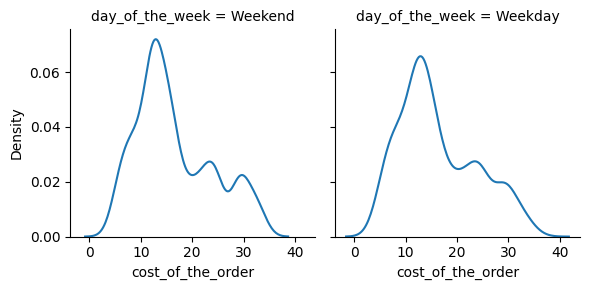

In [113]:
# Write the code here
g=sns.FacetGrid(data=df, col='day_of_the_week')
g.map(sns.kdeplot, 'cost_of_the_order')

Distribution of order cost is similar for weekend/weekday. Suggests that type of food and size of orders may be similar. Bothe suggest the most frequent order size has 1 entree.

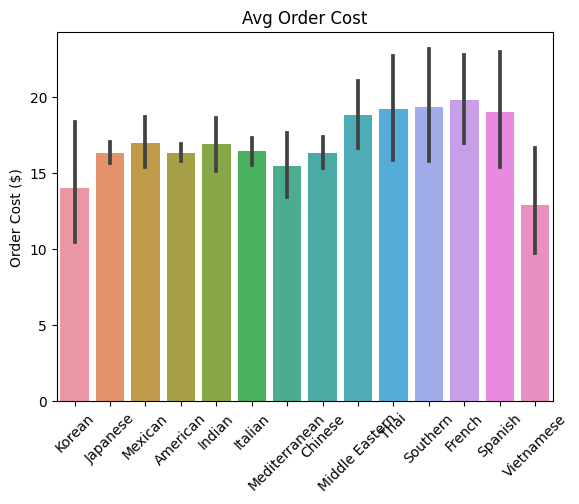

In [114]:
sns.barplot(data=df, x='cuisine_type', y='cost_of_the_order', estimator='mean')
plt.title('Avg Order Cost')
plt.ylabel('Order Cost ($)')
plt.xlabel('')
plt.xticks(rotation=45);

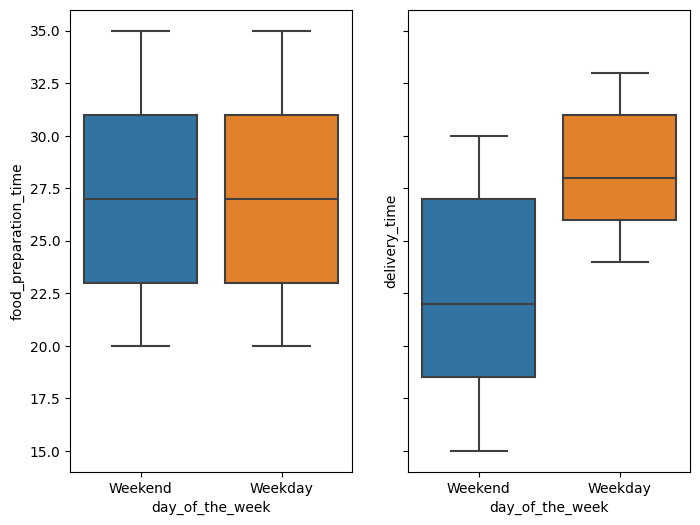

In [115]:
fig, axs = plt.subplots(ncols=2, figsize=(8,6), sharey=True)
sns.boxplot(data=df, x='day_of_the_week', y='food_preparation_time', ax=axs[0])
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time', ax=axs[1])
plt.show()

No difference in food prep time between weekends and weekdays. Delivery time faster on weekends than weekdays, even though order volume is higher on weekends. More delivery staff working? No/less traffic? Ordering pattern by time of day is different? (ie. more spread out on weekend vs concentrated around lunch on weekdays)

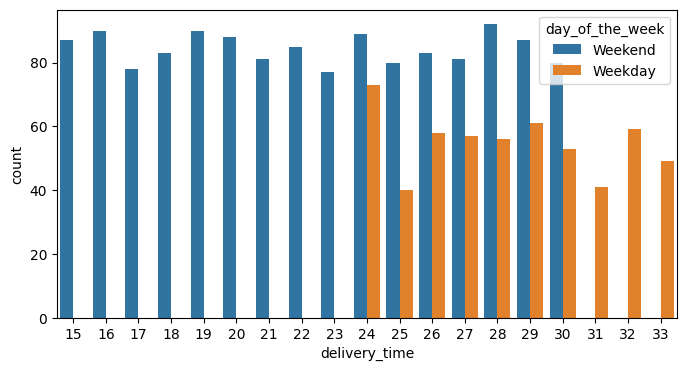

In [116]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='delivery_time', hue='day_of_the_week');

Delivery time has a uniform distribution for weekends and a uniform distribution for weekdays. However, on weekdays it has taken at least 24 minutes for orders to be delivered.

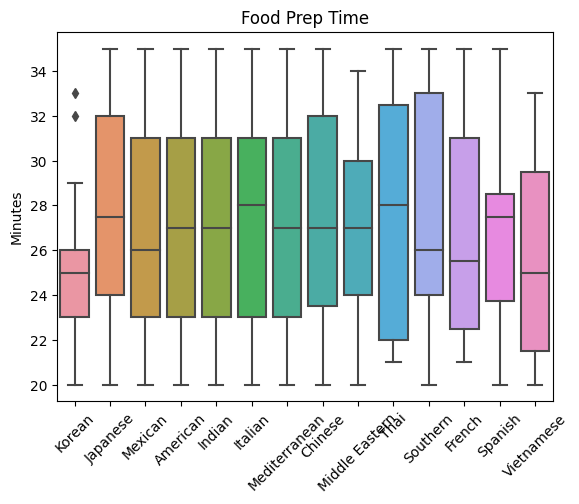

In [117]:
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time')
plt.title('Food Prep Time')
plt.ylabel('Minutes')
plt.xlabel('')
plt.xticks(rotation=45);

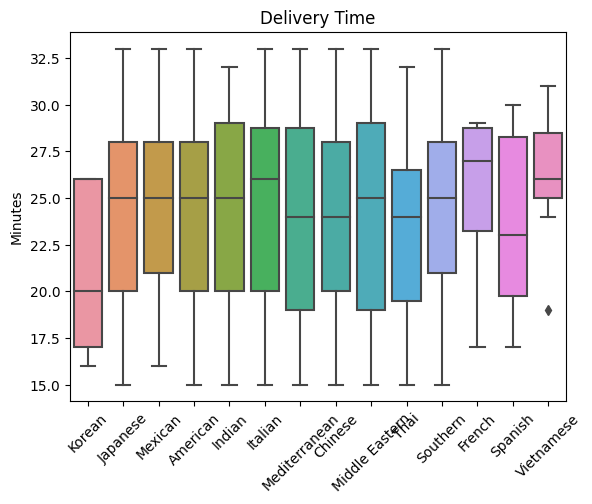

In [118]:
sns.boxplot(data=df, x='cuisine_type', y='delivery_time')
plt.title('Delivery Time')
plt.ylabel('Minutes')
plt.xlabel('')
plt.xticks(rotation=45);

In [119]:
# Get only rows with a rating
df_rated = df[df['rating'] != 'Not given'].copy()
# convert from string to int
df_rated['rating'] = df_rated['rating'].astype(int)
#df_rated.info()

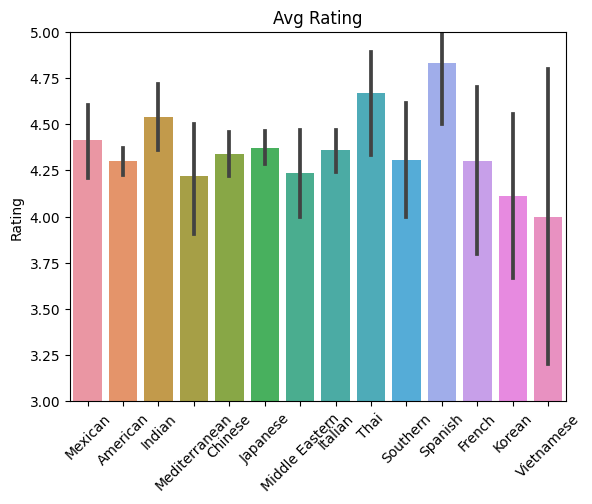

In [120]:
sns.barplot(data=df_rated, x='cuisine_type', y='rating', estimator='mean')
plt.title('Avg Rating')
plt.ylabel('Rating')
plt.ylim(3, 5)
plt.xlabel('')
plt.xticks(rotation=45);

With this amount of data, confidence intervals for most are overlapping. However, Spanish food has received higher ratings than American, Mediterranean, Chinese, Japanese and Italian.

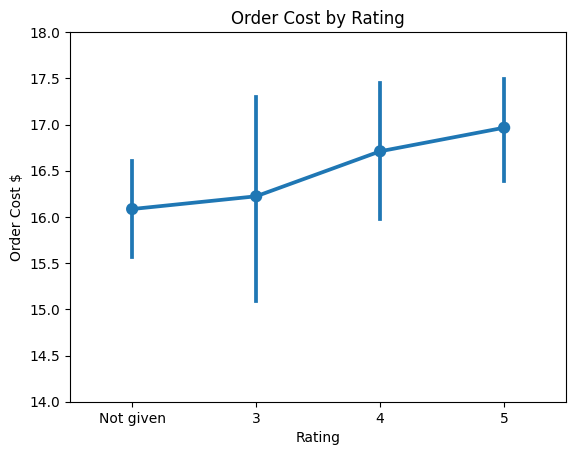

In [121]:
sns.pointplot(data=df, y='cost_of_the_order', x='rating', order=['Not given', '3', '4', '5'])
plt.title('Order Cost by Rating')
plt.ylabel('Order Cost $')
plt.xlabel('Rating')
plt.ylim(14,18);

Small differences in order cost by rating, but not significant

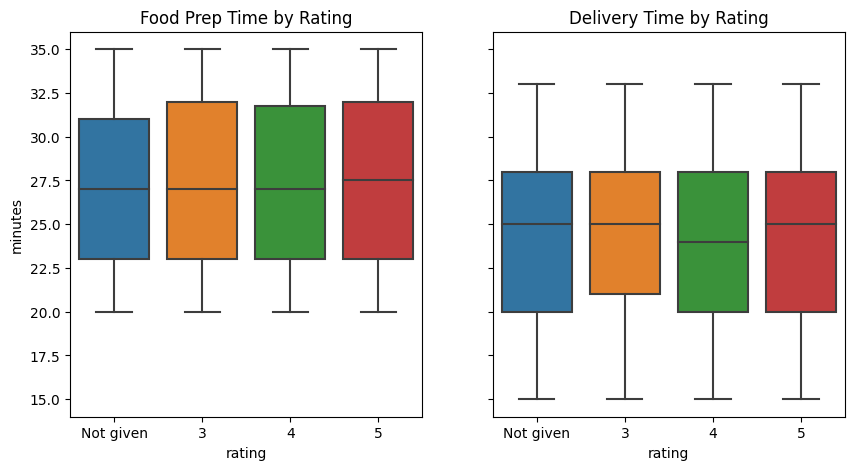

In [122]:
#create plot with 2 side by side plots
ig, axs = plt.subplots(ncols=2, figsize=(10,5), sharey=True)
sns.boxplot(data=df, x='rating', y='food_preparation_time', order=['Not given', '3', '4', '5'], ax=axs[0])
axs[0].set_title('Food Prep Time by Rating')
axs[0].set_ylabel('minutes')
sns.boxplot(data=df, x='rating', y='delivery_time', order=['Not given', '3', '4', '5'], ax=axs[1])
axs[1].set_title('Delivery Time by Rating')
axs[1].set_ylabel('');

<Axes: >

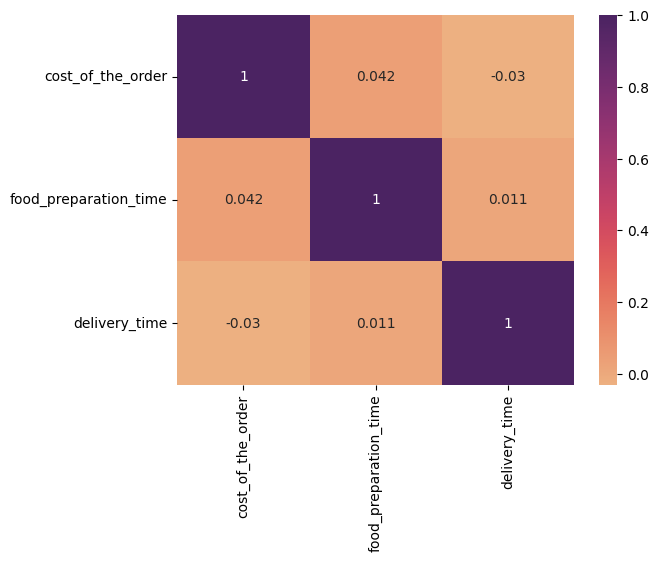

In [123]:
# correlation of numeric variables
sns.heatmap(data=df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].corr(), annot=True, cmap='flare')

No correlation among the numerical variables

In [124]:
top10_orders = df.value_counts(subset='restaurant_name', ascending=False)[:10]  # top 10 in order volume
top10_sales = df.groupby('restaurant_name')['cost_of_the_order'].sum().nlargest(10)  # top 10 in sales $
# combine top 10 by order volumne and by sales
top10 = pd.concat([top10_orders, top10_sales], axis=1)
top10.columns = ['orders', 'sales']
top10

,orders,sales
restaurant_name,,
Shake Shack,219,3579.53
The Meatball Shop,132,2145.21
Blue Ribbon Sushi,119,1903.95
Blue Ribbon Fried Chicken,96,1662.29
Parm,68,1112.76
RedFarm Broadway,59,965.13
RedFarm Hudson,55,921.21
TAO,49,834.50
Han Dynasty,46,755.29


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [125]:
# df_rated from previous section
rating_cts = df_rated.groupby('restaurant_name')['rating'].count()
avg_rating = df_rated.groupby('restaurant_name')['rating'].mean()
# combine rating count and avg rating into one object
ratings = pd.concat([rating_cts, avg_rating], axis=1)
# rename cols for easy access
ratings.columns = ['count', 'avg_rating']
# filter to those with >50 ratings and avg > 4
qual = ratings[(ratings['count']>50) & (ratings['avg_rating']>4)]
qual

,count,avg_rating
restaurant_name,,
Blue Ribbon Fried Chicken,64,4.328125
Blue Ribbon Sushi,73,4.219178
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905


#### Observations:
Not surprising that they also make up the top 4 restaurants in both order volume and sales

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [126]:
# total of all orders over $20
over_20 = df[df['cost_of_the_order']>20]['cost_of_the_order'].sum()
# total of order > $5 and <= $20
over_5 = df[(df['cost_of_the_order']>5) & (df['cost_of_the_order']<=20)]['cost_of_the_order'].sum()
# get appropriate revenue % from each
revenue = round(over_20*0.25 + over_5*0.15, 2)
print(f'Net revenue of ${revenue}')

Net revenue of $6166.3


#### Observations:
Net revenue is \$6166. On average it's about 20% of the order cost (total orders of $31315).

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [127]:
# new column for total time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
# row count for orders with total time >60
over60 = df[df['total_time']>60].shape[0]
pct_over60 = round(100 * over60 / df.shape[0], 1)
print(f'{pct_over60}% of orders take >60 minutes to prep and deliver')

10.5% of orders take >60 minutes to prep and deliver


#### Observations:
10.5%

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [128]:
del_time = df.groupby('day_of_the_week')['delivery_time'].mean()
print('Mean delivery time on weekdays is approx', round(del_time['Weekday'], 1), 'minutes')
print('Mean delivery time on weekends is approx', round(del_time['Weekend'], 1), 'minutes')

Mean delivery time on weekdays is approx 28.3 minutes
Mean delivery time on weekends is approx 22.5 minutes


#### Observations:
On average, deliveries take longer on weekdays

### Conclusion and Recommendations

In [129]:
# Spanish restaurants were noted to have highest ratings
# What restaurants are they? How many ratings?

# get list of Spanish restaurants
spanish_rest = df[df['cuisine_type']=='Spanish']['restaurant_name'].unique()
# make restaurant names into a column
ratings.reset_index(inplace=True)
# Pull only Spanish restaurants from ratings summary
ratings[ratings['restaurant_name'].isin(spanish_rest)]

,restaurant_name,count,avg_rating
20,Boqueria,4,4.75
37,DespaÌ±a,1,5.00
118,Socarrat Paella Bar,1,5.00


Although Spanish food was most highly rated, there are only 6 ratings. Not enough to draw any conclusions from.

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Deliveries on weekdays tend to take longer, despite fewer orders relative to weekends.
*  10% of orders took over an hour. Are customers given a time estimate when they place the order? If so, how well is that matching up with reality?
*  American and Japanese cuisines are the most popular. Within the top restaurant are some places that serve "comfort food" (burgers, fried chicken)
*  The most common rating is 'Not given'
*  Ratings alone do not give much information. If a customer rates an order a 3, is that the food, speed of delivery, quality/value?

### Recommendations:

*  Look at ways to decreased delivery time on weekdays. Would more staff delivering orders help? Is traffic a constraint? (other means of transportation?)
*  Incentivize customers to make repeat orders (what is the cost to acquire new customers relative to offering existing customers 5-10% off their next order within 1 week?)
*  More food ratings would be helpful. Can the app send a reminder 1 hour after delivery to ask the customer to rate the order? Also, being able to separate out ratings for the foor from delivery would be even better (separate ratings? checkboxes for what wasn't great?).
*  Find more restaurant partners. This could be restaurants similar to the most popular ones, it could mean filling in gaps or expanding geographically.

---